<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/moons_agglo_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


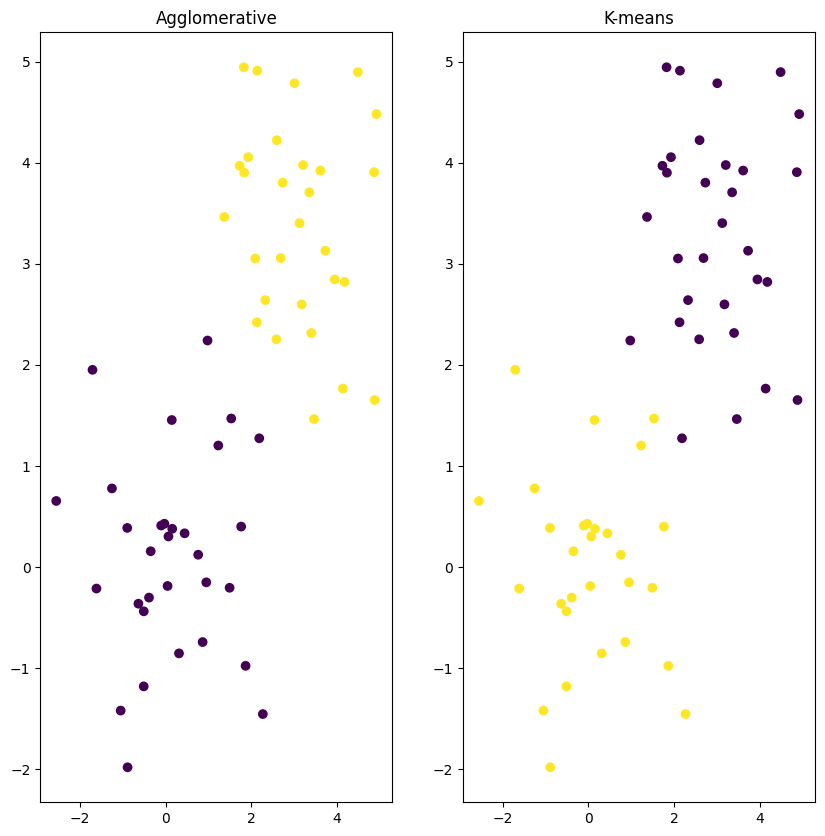

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_moons,make_blobs

# Genera datos aleatoriamente en dos grupos localizados en posiciones diferentes:
n_samples = 60

centers = [(0, 0),(3, 3)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
#X, y = make_moons(n_samples=n_samples,noise=0.1)

agglo = AgglomerativeClustering(n_clusters=2).fit_predict(X) 
kmeans = KMeans(n_clusters=2).fit_predict(X) 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=agglo)
ax.set_title('Agglomerative')
ax1 = fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)
ax1.set_title('K-means')
plt.show()

Numero d'observacions a cada cluster:

In [4]:
cluster1_kmeans = kmeans[kmeans==0]
cluster2_kmeans = kmeans[kmeans==1]
cluster1_agglo = agglo[agglo==0]
cluster2_agglo = agglo[agglo==1]

print('kmeans {} {}'.format(cluster1_kmeans.shape[0],cluster2_kmeans.shape[0]))
print('agglo {} {}'.format(cluster1_agglo.shape[0],cluster2_agglo.shape[0]))

kmeans 2485 2515
agglo 3801 1199


Comparem els dos resultats fent servir una mesura de similitud entre clusterings anomenada Adjusted Rand Score

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score

v1 = [0,0,1,1,1,1]
v2 = [1,1,1,0,0,0]

ARS = adjusted_rand_score(v1,v2)
print('ARS = {}'.format(ARS))

ARS = 0.32432432432432434


In [12]:
from sklearn.metrics.cluster import adjusted_rand_score

ARS = adjusted_rand_score(agglo,kmeans)
print('ARS = {}'.format(ARS))

ARS = 0.9549108204247243


In [13]:
v1 = [0,2,1,2,1,0]
v2 = [1,1,1,0,0,0]

ARS = adjusted_rand_score(v1,v2)
print('ARS = {}'.format(ARS))

ARS = -0.36363636363636365


mirem el dendrograma

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [213.75, 213.75, 250.0, 250.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [265.0, 265.0, 283.75, 283.75],
  [231.875, 231.875, 274.375, 274.375],
  [182.5, 182.5, 253.125, 253.125],
  [160.0, 160.0, 217.8125, 217.8125],
  [123.75, 123.75, 188.90625, 188.90625],
  [105.0, 105.0, 156.328125, 156.328125],
  [90.0, 90.0, 130.6640625, 130.6640625],
  [62.5, 62.5, 110.33203125, 110.33203125],
  [335.0, 335.0, 345.0, 345.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 3

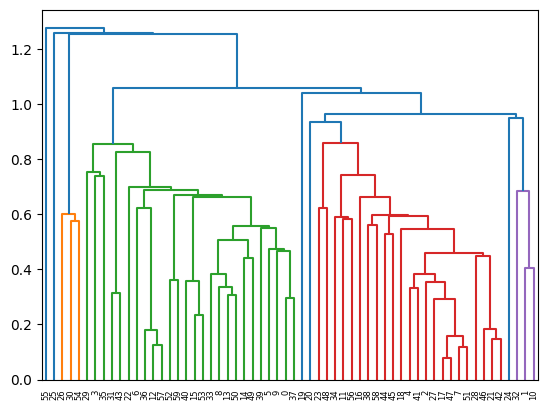

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z) 